In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
login_dataframe = pd.read_json('logins.json')
general_data = pd.read_json('ultimate_data_challenge.json')

In [3]:
login_dataframe.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_dataframe.describe

<bound method NDFrame.describe of                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]>

In [5]:
login_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
new_login_df = login_dataframe.set_index('login_time')

In [7]:
new_login_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [8]:
new_login_df['Count'] = 1

In [9]:
new_login_df.head()

,Count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [10]:
new_login_df_resampled = new_login_df.resample('15T').sum()

In [11]:
new_login_df_resampled.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<AxesSubplot:xlabel='login_time'>

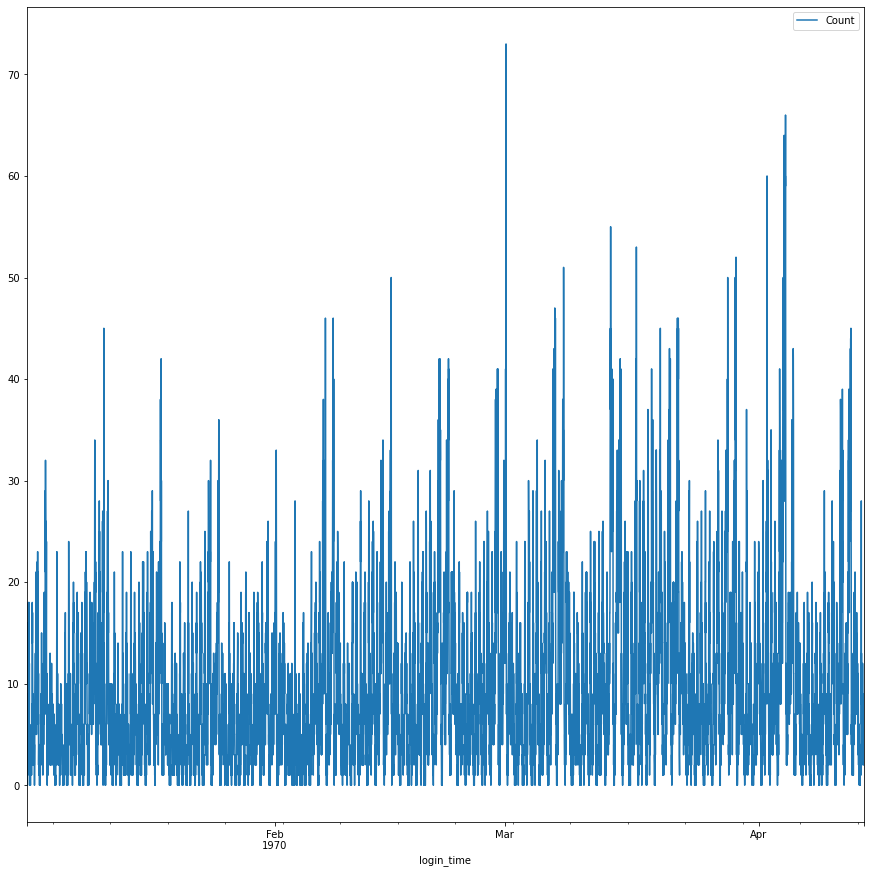

In [12]:
new_login_df_resampled.plot(figsize=(15,15))

## Now we will try to find if there is any trend in the dataset

In [13]:
new_login_df_resampled.describe()

,Count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


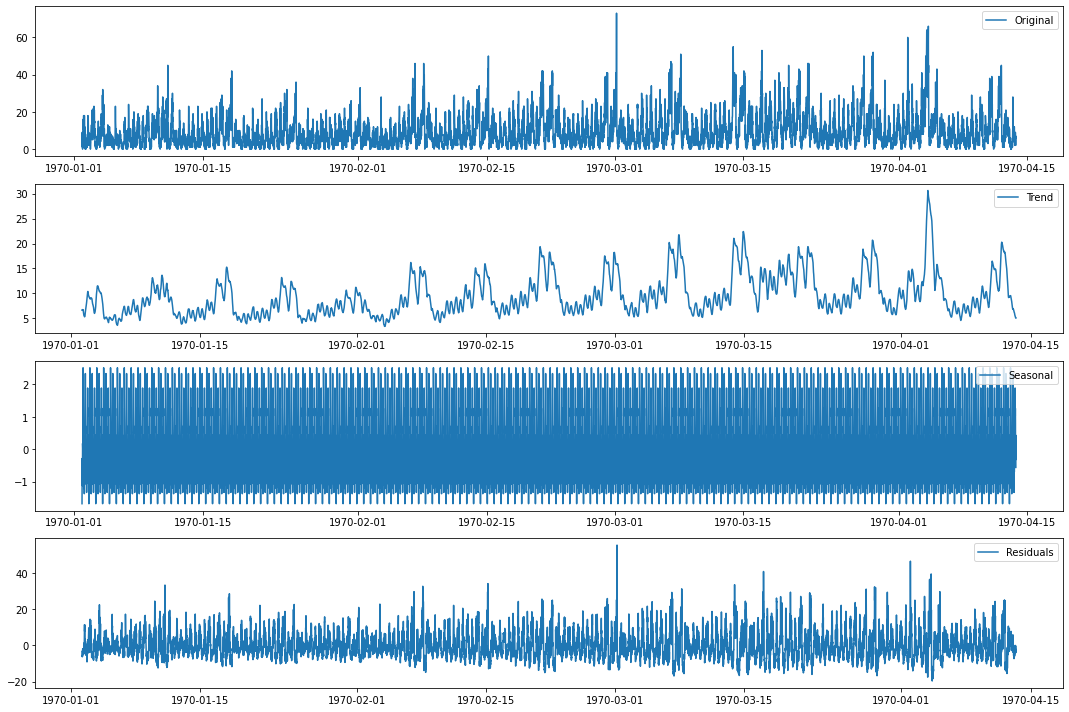

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(new_login_df_resampled['Count'],period=6*12)

# Plot the original data, the trend, the seasonality, and the residuals 
trend = decomposed.trend
seasonality = decomposed.seasonal
residual = decomposed.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(new_login_df_resampled, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonality, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

### Second part of the Challenge

In [15]:
general_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [16]:
general_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [17]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
general_data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


<AxesSubplot:>

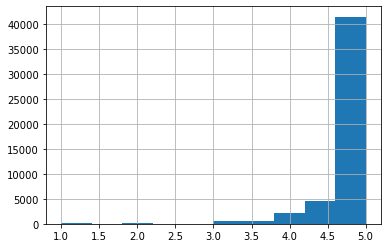

In [19]:
general_data['avg_rating_by_driver'].hist()

In [20]:
custom_total = general_data.isnull().sum().sort_values(ascending=False)
custom_percent = ((general_data.isnull().sum()/general_data.isnull().count())*100).sort_values(ascending=False)
missing_custom_data = pd.concat([custom_total,custom_percent],axis=1,keys=['Total','Percent'])
missing_custom_data.head(15)

,Total,Percent
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402
avg_dist,0,0.000
weekday_pct,0,0.000
ultimate_black_user,0,0.000
surge_pct,0,0.000
last_trip_date,0,0.000
avg_surge,0,0.000
signup_date,0,0.000


<AxesSubplot:xlabel='avg_rating_of_driver', ylabel='count'>

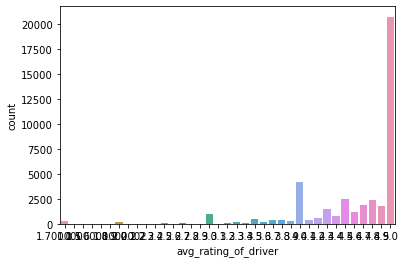

In [21]:
sns.countplot(x="avg_rating_of_driver",data=general_data)

<AxesSubplot:xlabel='avg_rating_by_driver', ylabel='count'>

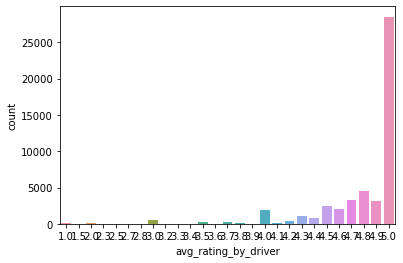

In [22]:
sns.countplot(x="avg_rating_by_driver",data=general_data)

In [23]:
for cols in ['avg_rating_of_driver','avg_rating_by_driver']:
    empty_data = general_data[general_data[cols].isnull()].copy().index.tolist()
    general_data[cols].iloc[empty_data] = general_data[cols].mean()

C:\Users\kiran\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [24]:
custom_total = general_data.isnull().sum().sort_values(ascending=False)
custom_percent = ((general_data.isnull().sum()/general_data.isnull().count())*100).sort_values(ascending=False)
missing_custom_data = pd.concat([custom_total,custom_percent],axis=1,keys=['Total','Percent'])
missing_custom_data.head(15)

,Total,Percent
phone,396,0.792
avg_rating_by_driver,0,0.000
avg_dist,0,0.000
weekday_pct,0,0.000
ultimate_black_user,0,0.000
surge_pct,0,0.000
last_trip_date,0,0.000
avg_surge,0,0.000
avg_rating_of_driver,0,0.000
signup_date,0,0.000


In [25]:
general_data.dropna(subset=['phone'],inplace=True)

In [26]:
custom_total = general_data.isnull().sum().sort_values(ascending=False)
custom_percent = ((general_data.isnull().sum()/general_data.isnull().count())*100).sort_values(ascending=False)
missing_custom_data = pd.concat([custom_total,custom_percent],axis=1,keys=['Total','Percent'])
missing_custom_data.head(15)

,Total,Percent
avg_rating_by_driver,0,0.0
avg_dist,0,0.0
weekday_pct,0,0.0
ultimate_black_user,0,0.0
surge_pct,0,0.0
phone,0,0.0
last_trip_date,0,0.0
avg_surge,0,0.0
avg_rating_of_driver,0,0.0
signup_date,0,0.0


In [27]:
general_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [28]:
print(general_data['city'].value_counts(dropna=False))
print(general_data['phone'].value_counts(dropna=False))
print(general_data['ultimate_black_user'].value_counts(dropna=False))

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64
iPhone     34582
Android    15022
Name: phone, dtype: int64
False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [29]:
general_data_new = general_data.replace({'ultimate_black_user':{False:0,True:1},'phone':{'iPhone':1,'Android':2},'city':{'Winterfell':1,'King\'s Landing':2,'Astapor':3}})

In [30]:
general_data_new.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,2,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0
1,3,0,2014-01-29,5.0,1.00,2014-05-05,2,0.0,0,50.0,8.26,5.0
2,3,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0
3,2,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9
4,1,14,2014-01-27,4.4,1.19,2014-03-15,2,11.8,0,82.4,3.13,4.9


In [31]:
general_data_new['signup_date'] = general_data_new['signup_date'].astype('datetime64[ns]')
general_data_new['last_trip_date'] = general_data_new['last_trip_date'].astype('datetime64[ns]')

In [32]:
general_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  int64         
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  int64         
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  int64         
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(4)
mem

In [33]:
general_data_new['difference_btw'] = general_data_new['last_trip_date'] - general_data_new['signup_date']

In [34]:
general_data_new['difference_btw'].head()

0   143 days
1    96 days
2     1 days
3   170 days
4    47 days
Name: difference_btw, dtype: timedelta64[ns]

In [35]:
general_data_new['difference_btw'] = general_data_new['last_trip_date'].dt.to_period('M').astype('int') - general_data_new['signup_date'].dt.to_period('M').astype('int')

In [36]:
general_data_new['difference_btw']

0        5
1        4
2        0
3        5
4        2
        ..
49995    5
49996    0
49997    4
49998    0
49999    3
Name: difference_btw, Length: 49604, dtype: int64

<AxesSubplot:xlabel='difference_btw', ylabel='count'>

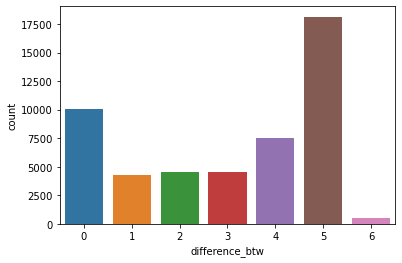

In [37]:
sns.countplot(x='difference_btw',data=general_data_new)

In [38]:
final_data = general_data_new.drop(['signup_date','last_trip_date'],axis=1)

In [39]:
def formtarget(row):
    target = 0
    if row >= 5:
        target = 1
    return target
    
final_data['target'] = final_data['difference_btw'].apply(lambda x:formtarget(x))

In [40]:
final_data

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,difference_btw,target
0,2,4,4.700000,1.10,1,15.4,1,46.2,3.67,5.0,5,1
1,3,0,5.000000,1.00,2,0.0,0,50.0,8.26,5.0,4,0
2,3,3,4.300000,1.00,1,0.0,0,100.0,0.77,5.0,0,0
3,2,9,4.600000,1.14,1,20.0,1,80.0,2.36,4.9,5,1
4,1,14,4.400000,1.19,2,11.8,0,82.4,3.13,4.9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,5.000000,1.00,1,0.0,0,100.0,5.63,4.2,5,1
49996,3,1,4.601559,1.00,1,0.0,0,0.0,0.00,4.0,0,0
49997,1,0,5.000000,1.00,2,0.0,1,100.0,3.86,5.0,4,0
49998,3,2,3.000000,1.00,1,0.0,0,100.0,4.58,3.5,0,0


<AxesSubplot:>

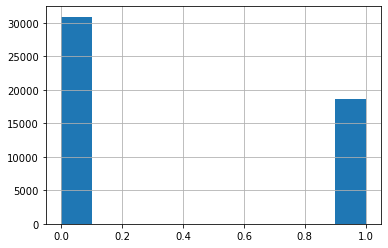

In [41]:
final_data['target'].hist()

<AxesSubplot:>

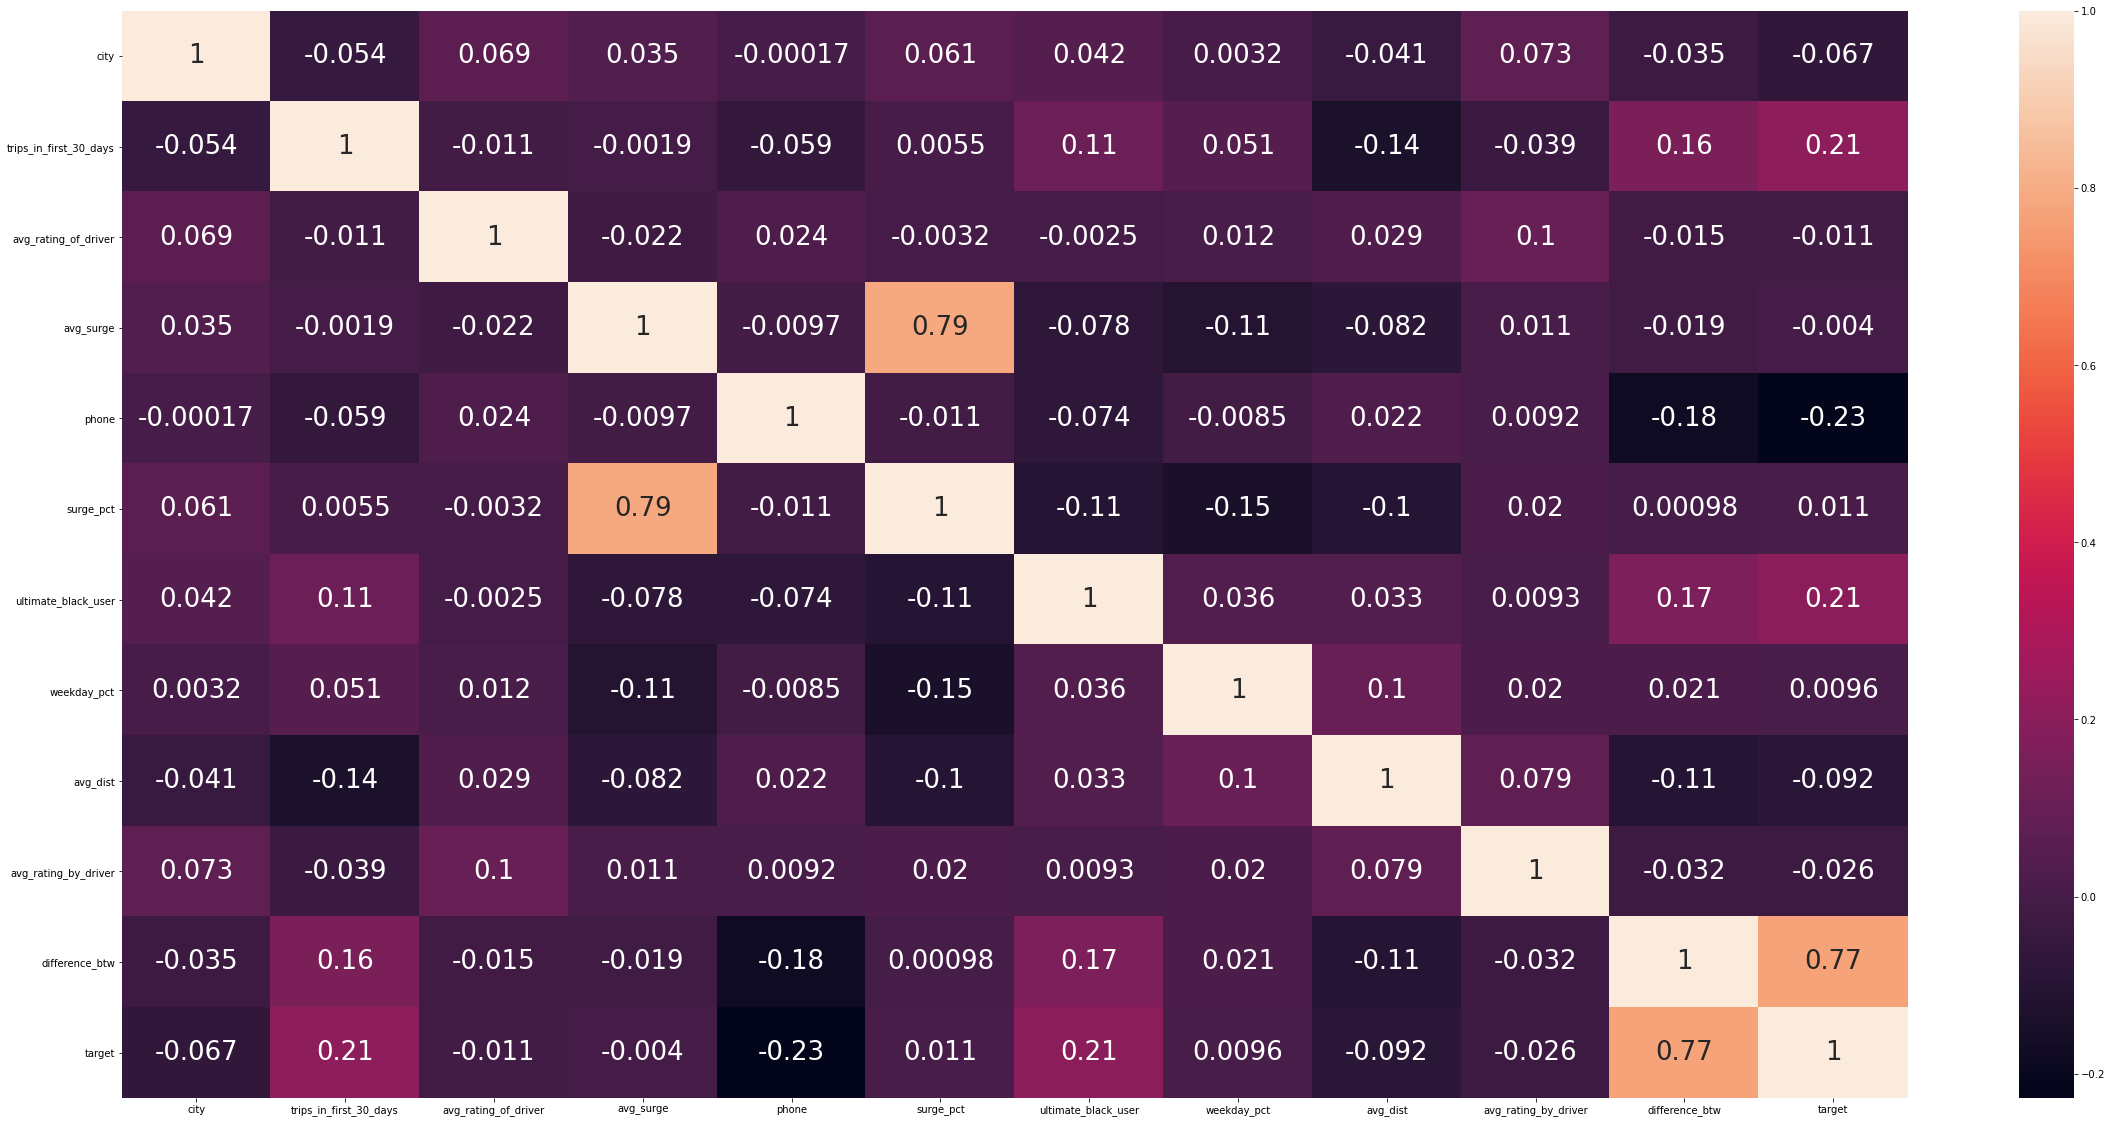

In [42]:
plt.figure(figsize=(40,20))
sns.heatmap(final_data.corr(),annot=True,annot_kws={"size": 26})

In [43]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  int64  
 1   trips_in_first_30_days  49604 non-null  int64  
 2   avg_rating_of_driver    49604 non-null  float64
 3   avg_surge               49604 non-null  float64
 4   phone                   49604 non-null  int64  
 5   surge_pct               49604 non-null  float64
 6   ultimate_black_user     49604 non-null  int64  
 7   weekday_pct             49604 non-null  float64
 8   avg_dist                49604 non-null  float64
 9   avg_rating_by_driver    49604 non-null  float64
 10  difference_btw          49604 non-null  int64  
 11  target                  49604 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 6.2 MB


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = final_data.drop(['target'],axis = 1)
X_train,x_test,y_train,y_test = train_test_split(X,final_data['target'],test_size=0.2,random_state=9)

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gfc_params = {'loss': ['deviance', 'exponential'],'learning_rate':[0.01,0.1,1],'n_estimators': [30,100,300],'criterion':['friedman_mse', 'mse', 'mae']}
gfc_grid = GradientBoostingClassifier()
gcv_gfc = GridSearchCV(gfc_grid,gfc_params,cv=3)
gcv_gfc.fit(X_train,y_train)

KeyboardInterrupt: 

In [49]:
print("Best Score:" + str(gcv_gfc.best_score_))
print("Best Parameters: " + str(gcv_gfc.best_params_))

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [50]:
gfc = GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.01,loss='deviance',n_estimators=100)

In [51]:
gfc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [52]:
Y_predict = gfc.predict(x_test)

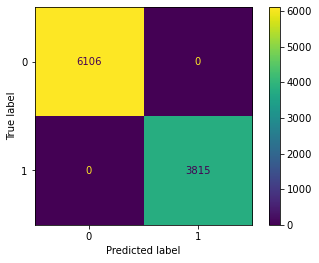

In [53]:
from sklearn.metrics import plot_confusion_matrix
disp_gfc = plot_confusion_matrix(gfc,x_test,y_test)
plt.show()

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6106
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      9921
   macro avg       1.00      1.00      1.00      9921
weighted avg       1.00      1.00      1.00      9921

